<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">

<p>مدل پیکربندی در ASP.NET Core از زمان .NET Core 1.0 تقریباً بدون تغییر باقی مانده است. این مدل به شما اجازه می‌دهد تا تنظیمات مختلف برنامه خود را از منابع گوناگون (مانند فایل‌های JSON، متغیرهای محیطی و غیره) بارگذاری کنید.</p>

<h5>معرفی <code>ConfigurationManager</code> در .NET 6</h5>
<p>در .NET 6، کلاس جدیدی به نام <code>ConfigurationManager</code> معرفی شده است که کار با پیکربندی را ساده‌تر می‌کند. این کلاس دو رابط (interface) اصلی مرتبط با پیکربندی را پیاده‌سازی می‌کند:</p>
<ol><li><p><strong><code>IConfigurationBuilder</code>:</strong> این رابط توصیف می‌کند که چگونه باید ساختار نهایی پیکربندی برای برنامه شما ایجاد شود. در واقع، <code>IConfigurationBuilder</code> به شما اجازه می‌دهد تا منابع مختلف پیکربندی (مانند فایل‌های JSON یا متغیرهای محیطی) را به مدل پیکربندی خود اضافه کنید.</p></li><li><p><strong><code>IConfigurationRoot</code>:</strong> این رابط نگهدارنده‌ی مقادیر پیکربندی است. بعد از اینکه <code>IConfigurationBuilder</code> فرآیند ساختن پیکربندی را کامل کرد، <code>IConfigurationRoot</code> مقادیر نهایی را ذخیره می‌کند.<br>
<code>IConfigurationRoot</code> یک پیاده سازه از <code>IConfiguration</code> است.
</p></li></ol>

<h3>نحوه‌ی عملکرد <code>ConfigurationManager</code></h3>
<h5>1. <strong>ایجاد <code>ConfigurationManager</code> (مرحله‌ی ساخت و تنظیم منابع)</strong></h5>
<p><strong>نقش <code>IConfigurationBuilder</code>:</strong></p>
<ul><li><code>ConfigurationManager</code> به صورت داخلی از <code>IConfigurationBuilder</code> استفاده می‌کند. وقتی <code>ConfigurationManager</code> را می‌سازید یا از روش‌هایی مانند <code>CreateDefaultBuilder</code> استفاده می‌کنید، شما منابع پیکربندی مختلف (مثل فایل‌های JSON، متغیرهای محیطی و غیره) را به این Builder اضافه می‌کنید.</li><li>هر بار که شما یک منبع پیکربندی اضافه می‌کنید، این منبع به لیستی از منابع در <code>IConfigurationBuilder</code> اضافه می‌شود.</li></ul>
</div>

In [ ]:
var config = new ConfigurationManager();
config.AddJsonFile("appsettings.json")
      .AddJsonFile("appsettings.Development.json", optional: true)
      .AddEnvironmentVariables();


<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<h5>2. <strong>اضافه کردن منابع پیکربندی (<code>IConfigurationProvider</code> ها)</strong></h5>
<ul><li><p><strong>نقش <code>IConfigurationProvider</code>:</strong></p><ul><li>هر منبع پیکربندی که به <code>ConfigurationManager</code> اضافه می‌شود، یک <code>IConfigurationProvider</code> مربوط به آن منبع را ایجاد می‌کند.</li><li>این <code>IConfigurationProvider</code> وظیفه‌ی بارگذاری تنظیمات از منبع مشخص شده را بر عهده دارد.</li><li>به عنوان مثال، <code>JsonConfigurationProvider</code> تنظیمات را از یک فایل JSON بارگذاری می‌کند، در حالی که <code>EnvironmentVariablesConfigurationProvider</code> تنظیمات را از متغیرهای محیطی بارگذاری می‌کند.</li></ul><p><strong>مثال:</strong></p><ul><li>وقتی <code>AddJsonFile("appsettings.json")</code> را فراخوانی می‌کنید، <code>JsonConfigurationProvider</code> برای این فایل ایجاد می‌شود.</li><li>وقتی <code>AddEnvironmentVariables()</code> را فراخوانی می‌کنید، یک <code>EnvironmentVariablesConfigurationProvider</code> ایجاد می‌شود.</li></ul></li></ul>

<h5>3. <strong>ترکیب و نگهداری تنظیمات (<code>IConfigurationRoot</code>)</strong></h5>
<p><strong>نقش <code>IConfigurationRoot</code>:</strong></p>
<ul><li>پس از اضافه کردن تمام منابع پیکربندی و ایجاد <code>IConfigurationProvider</code> ها، <code>ConfigurationManager</code> یا <code>IConfigurationBuilder</code>، یک شیء <code>IConfigurationRoot</code> ایجاد می‌کند.</li><li><code>IConfigurationRoot</code> نمایانگر ساختار نهایی تنظیمات است که شامل ترکیب تمام تنظیمات بارگذاری‌شده از منابع مختلف است.</li><li><code>IConfigurationRoot</code> تنظیمات را به صورت سلسله‌مراتبی نگه می‌دارد و دسترسی به آنها را فراهم می‌کند.</li><li>همچنین، اگر منبعی قابلیت بازسازی (reload) داشته باشد، <code>IConfigurationRoot</code> می‌تواند تنظیمات را در صورت تغییر منابع، بازسازی کند.</li></ul>
</div>

In [ ]:
var configuration = config.Build();
var siteTitle = configuration["AppSettings:SiteTitle"];

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<h5>4. <strong>اولویت‌بندی و بازنویسی تنظیمات</strong></h5>
<ul><li><strong>نقش <code>IConfigurationRoot</code> و <code>IConfigurationProvider</code>:</strong><ul><li>تنظیماتی که در آخرین منبع اضافه شده‌اند (آخرین <code>IConfigurationProvider</code> که اضافه شده است)، می‌توانند تنظیمات قبلی را بازنویسی کنند.</li><li>به عنوان مثال، اگر یک تنظیم با همان کلید هم در <code>appsettings.json</code> و هم در <code>appsettings.Development.json</code> وجود داشته باشد، مقدار موجود در <code>appsettings.Development.json</code> (که بعد از <code>appsettings.json</code> اضافه شده) جایگزین مقدار قبلی می‌شود.</li><li>این فرآیند بازنویسی به صورت خودکار توسط <code>IConfigurationRoot</code> مدیریت می‌شود.</li></ul></li></ul>
</div>

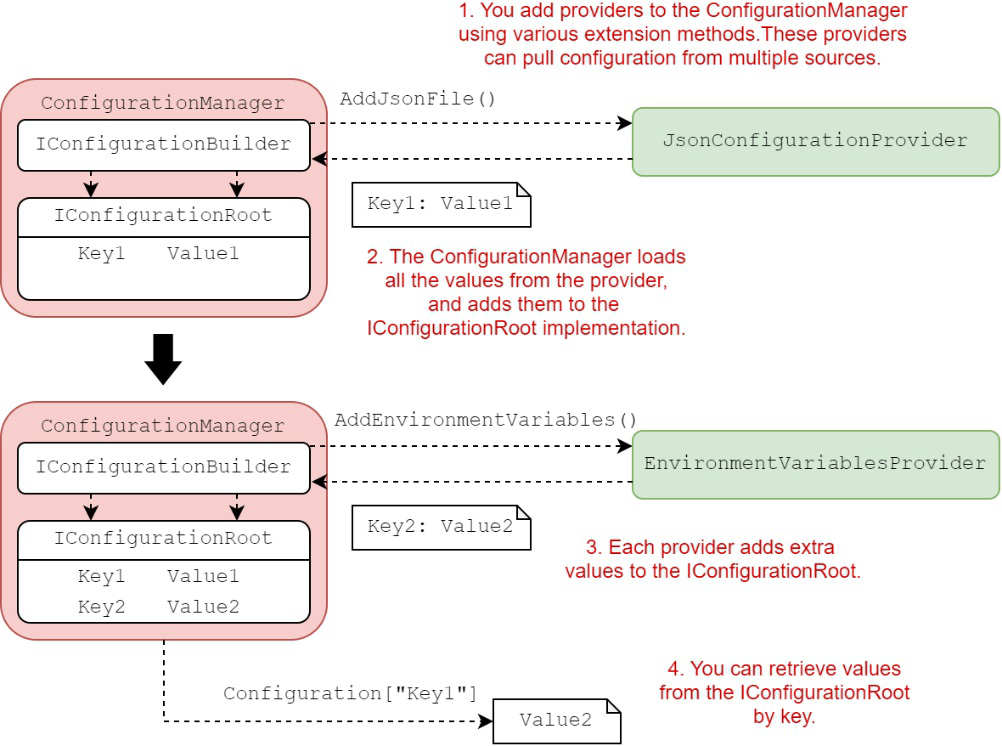

In [ ]:
var builder = WebApplication.CreateBuilder(args);
var app = builder.Build();

app.MapGet("/", () => "Hello World!");

app.Run();


<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<p> وقتی از <code>WebApplication.CreateBuilder(args)</code> استفاده می‌کنید، ASP.NET Core به طور خودکار فایل‌های تنظیمات (<code>appsettings.json</code> و <code>appsettings.{Environment}.json</code>)، متغیرهای محیطی، و آرگومان‌های خط فرمان را بارگذاری کرده و آنها را با هم ترکیب می‌کند.</p>
</div>

***ASP.NET Core*** ships with configuration providers for loading data from common locations:  
- `JSON` files  
  
- Extensible Markup Language (`XML`) files
- `Environment variables`
- `Command-line arguments`
- Initialization (`INI`) files

If these providers don’t fit your requirements, you can write your `own provider`

In [ ]:
public class DatabaseConfigurationProvider : ConfigurationProvider
{
    private readonly IServiceProvider _serviceProvider;

    public DatabaseConfigurationProvider(IServiceProvider serviceProvider)
    {
        _serviceProvider = serviceProvider;
    }

    public override void Load()
    {
        using (var scope = _serviceProvider.CreateScope())
        {
            var dbContext = scope.ServiceProvider.GetRequiredService<NiazeroozDbContext>();

            // خواندن تنظیمات از جدول AppSettings
            Data = dbContext.Set<AppSettings>()
                            .ToDictionary(c => c.Key, c => c.Value);
        }
    }
}

public class DatabaseConfigurationSource : IConfigurationSource
{
    private readonly IServiceProvider _serviceProvider;

    public DatabaseConfigurationSource(IServiceProvider serviceProvider)
    {
        _serviceProvider = serviceProvider;
    }

    public IConfigurationProvider Build(IConfigurationBuilder builder)
    {
        return new DatabaseConfigurationProvider(_serviceProvider);
    }
}

public static class DatabaseConfigurationExtensions
{
    public static IConfigurationBuilder AddDatabase(this IConfigurationBuilder builder, IServiceProvider serviceProvider)
    {
        return builder.Add(new DatabaseConfigurationSource(serviceProvider));
    }
}



In [ ]:
var builder = WebApplication.CreateBuilder(args);

// ثبت DbContext در DI Container
builder.Services.AddDbContext<NiazeroozDbContext>((sp, options) =>
{
    options.UseSqlServer(builder.Configuration.GetConnectionString("SharedConnection")!);
});

// افزودن Database Configuration Provider به ConfigurationBuilder
builder.Configuration.AddDatabase(builder.Services.BuildServiceProvider());

var app = builder.Build();

app.MapGet("/", (IConfiguration config) =>
{
    // استفاده از تنظیمات خوانده شده از دیتابیس
    var siteTitle = config["SiteTitle"];
    return $"Site Title from Database: {siteTitle}";
});

app.Run();

In [ ]:
{
  "AppSettings": {
    "SiteTitle": "My ASP.NET Core App",
    "MaxItems": 100,
    "ApiKey": "123456789"
  }
}

you can overrid these settings with `Environment Variables` , for example for `ApiKey`, you can define `AppSettings__ApiKey` ***environment variables*** and asp.net core recognize `__` as hierarchy pattern

you can store the values as ***any data type numbers***, but the provider will read and store them ***internally*** `as strings`.

The **configuration keys** `are not case-sensitive` in your app

### Adding a configuration provider in Program

***WebApplicationBuilder*** creates a `ConfigurationManager` instance and exposes it as the property `Configuration`

You can access the ***ConfigurationManager*** directly on `WebApplicationBuilder.Configuration` and `WebApplication.Configuration`. Both properties reference the `same ConfigurationManager instance`.

In [ ]:
WebApplicationBuilder builder = WebApplication.CreateBuilder(args);

//builder.Configuration

var app = builder.Build();

//app.Configuration

***WebApplicationBuilder*** adds several `default configuration providers` to the
ConfigurationManager, which we’ll look at in more detail throughout this
chapter:  
- `JSON file provider`—Loads settings from an optional JSON file called `appsettings.json`. It also loads settings from an optional environmentspecific JSON file called `appsettings.ENVIRONMENT.json`.
- `User Secrets`—Loads secrets that are stored safely during development.
- `Environment variables`—Loads environment variables as configuration variables, which are great for storing secrets in production
- `Command-line` arguments—Uses values passed as arguments when you run your app.


<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<h5>کاربرد User Secrets</h5>
<p>در طول توسعه، ممکن است نیاز داشته باشید اطلاعات حساسی را در برنامه خود استفاده کنید که نمی‌خواهید آنها را در فایل‌های پیکربندی عمومی مانند <code>appsettings.json</code> یا <code>appsettings.Development.json</code> ذخیره کنید. به جای این کار، <code>User Secrets</code> به شما اجازه می‌دهد تا این اطلاعات را در یک فایل پیکربندی جداگانه و امن ذخیره کنید که فقط در محیط توسعه قابل دسترسی است.</p>

<h5>نحوه استفاده از User Secrets</h5>
<ol>
<li>
<p><strong>فعال‌سازی User Secrets:</strong></p>
<p>ابتدا باید <code>User Secrets</code> را در پروژه خود فعال کنید. این کار با استفاده از دستوری در محیط CLI .NET انجام می‌شود:</p>
<p dir="ltr"><code>dotnet user-secrets init
</code></p>
<p>این دستور یک فایل پیکربندی مخصوص <code>User Secrets</code> ایجاد می‌کند که در خارج از پروژه شما ذخیره می‌شود و به فایل پروژه <code>.csproj</code> یک <code>UserSecretsId</code> اضافه می‌کند.</p>
</li>
<li>
<p><strong>افزودن اطلاعات به User Secrets:</strong></p>
<p dir="ltr"><code>dotnet user-secrets set "AppSettings:ApiKey" "your-secret-api-key"
</code></p>
<p>این دستور اطلاعات را به فایل <code>secrets.json</code> که به صورت محلی در مسیر کاربر (برای مثال در ویندوز: <code>%APPDATA%\Microsoft\UserSecrets\&lt;user_secrets_id&gt;\secrets.json</code>) ذخیره می‌شود، اضافه می‌کند.</p>
</li>
<li>
<p><strong>دسترسی به اطلاعات User Secrets در برنامه:</strong></p>
<p>ASP.NET Core به طور پیش‌فرض <code>User Secrets</code> را بارگذاری می‌کند و این اطلاعات را به کانفیگوریشن برنامه اضافه می‌کند. می‌توانید این اطلاعات را مانند هر تنظیمات دیگری که در فایل‌های پیکربندی JSON ذخیره کرده‌اید، دسترسی داشته باشید:</p>
</li>
</ol>

<h5>ویژگی‌های کلیدی User Secrets</h5>
<ul><li><strong>ایمنی:</strong> <code>User Secrets</code> فقط در محیط توسعه استفاده می‌شود و به مخزن‌های Git یا دیگر سیستم‌های کنترل نسخه اضافه نمی‌شود.</li><li><strong>سهولت استفاده:</strong> بدون نیاز به ایجاد تغییرات پیچیده در ساختار پروژه، می‌توانید به سادگی اطلاعات حساس را مدیریت کنید.</li><li><strong>تنها برای توسعه:</strong> <code>User Secrets</code> به صورت پیش‌فرض فقط در <code>Development</code> بارگذاری می‌شود و برای محیط‌های تولید یا تست استفاده نمی‌شود.</li></ul>
</div>

In [ ]:
//you can clear default load settings

WebApplicationBuilder builder = WebApplication.CreateBuilder(args);

builder.Configuration.Sources.Clear(); 

builder.Configuration.AddJsonFile("appsettings.json", optional: true); //exising file is optional

WebApplication app = builder.Build();

app.MapGet("/", () => app.Configuration.AsEnumerable()); 

app.Run();

You can access the `IConfiguration` object directly in **Program.cs**  
but the ***ConfigurationManager*** is also registered as `IConfiguration` in the dependency injection (`DI`) container  
  
you can `inject` it into ***your classes*** and ***endpoint handlers***

In [ ]:
{
  "Logging": {
    "LogLevel": {
      "Default": "Information",
      "Microsoft.AspNetCore": "Warning"
    }
  },
  "AllowedHosts": "*",
  "MapSettings": {
    "DefaultZoomLevel": 9,
    "DefaultLocation": {
      "latitude": 50.500,
      "longitude": -4.000
    }
  }
}

In [ ]:
app.MapGet("/", (IConfiguration config) => config.AsEnumerable());

var zoomLevel = builder.Configuration["MapSettings:DefaultZoomLevel"];

If the requested ***configuration key*** `doesn’t exist`, you get a `null` value.

In [ ]:
var lat = builder.Configuration
    .GetSection("MapSettings")["DefaultLocation:Latitude"];

### Using multiple providers to override configuration

When you add a provider, you’re setting **some** `key-value pairs`. When you ***add a second provider***, the provider can `add new keys` or `overwrite` the **value** of ***existing keys***.

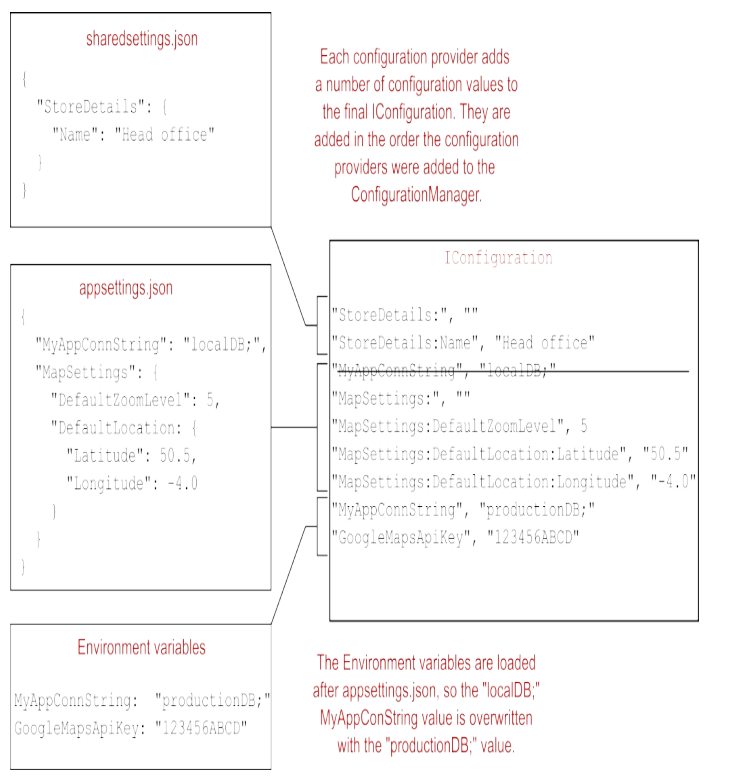

### Storing configuration secrets safely

This data could be a `password`, a `connection string`, or an `API key` for a remote service.

Storing these values in **appsettings.json** is generally a `bad idea`, as you should
`never commit` secrets to ***source control***;

the **easiest** and **most common approaches** are to use `environment variables` for secrets on your `production server` and `User Secrets` ***locally***.

Neither approach is truly secure, in that `neither` stores values in an `encrypted format`.

### Storing secrets in environment variables in production

You can add the ***environment variable*** configuration provider by using the
`AddEnvironmentVariables` extension method

The `WebApplicationBuilder` adds the environment variable provider to the
ConfigurationManager `by default`.

You can create the same `hierarchical sections` in environment variables by using a colon (`:`) or a double underscore (`__`)  
  
`MapSettings:MaxNumberOfPoints` or `MapSettings__MaxNumberOfPoints`

Some environments, such as `Linux`, ***don’t allow*** the `colon` in environment
variables.

use the `colon` when ***retrieving values*** from an `IConfiguration` in your app

`AddEnvironmentVariables("SomePrefix")` for add `specific` key for environment variable to my app. The ***prefix*** is `removed` from the **key** before it’s added to the `ConfigurationManager`,

### Reloading configuration values when they change

***Reloading*** is generally available `only` for `file-based` configuration providers, such as the ***JSON provider***, as `opposed` to the ***environment variable*** provider

In [ ]:
WebApplicationBuilder builder = WebApplication.CreateBuilder(args);
builder.Configuration.Sources.Clear();
builder.Configuration
    .AddJsonFile(
        "appsettings.json",
        optional: true,
        reloadOnChange: true);

WebApplication app = builder.Build();

app.MapGet("/", () => app.Configuration.AsEnumerable());

app.Run();

***WebApplicationBuilder*** configures the `appsettings.json` with `reloadOnChange:true` by default.

In this case, ***ASP.NET Core*** sets up a `file watcher` in the ***background***.

***any changes*** you make to the file will be `mirrored in the IConfiguration`.